In [36]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import NamedTuple
import scienceplots
plt.style.use(['science', 'ieee'])

In [37]:
class Action(NamedTuple):
    start: float  # time in seconds
    foot: int  # which foot (0-3), -1 for no contact
    dx: float  # x displacement in meters
    dy: float  # y displacement in meters
    duration: float  # duration in seconds

In [38]:
data = Path.cwd() / "data" / "contact_schedule.csv"

import pandas as pd
df = pd.read_csv(data, sep=',', header=None)

In [39]:
frequency = 25  # Hz

actions: list[Action] = []

for i, row in enumerate(df.values):
    foot, dx, dy, duration = row
    foot = int(foot)
    if foot == -1:
        continue
    t = i/frequency
    actions.append(Action(t, foot, dx, dy, duration))

print(actions)

[Action(start=0.28, foot=2, dx=-0.0150000005960464, dy=-0.1050000041723251, duration=0.2294134795665741), Action(start=0.32, foot=1, dx=0.0900000035762786, dy=0.0600000023841857, duration=0.1702935248613357), Action(start=0.56, foot=0, dx=-0.0300000011920928, dy=-0.1500000059604644, duration=0.2166024893522262), Action(start=0.64, foot=3, dx=0.0, dy=0.0750000029802322, duration=0.2302067130804062), Action(start=0.96, foot=2, dx=0.0600000023841857, dy=-0.1200000047683715, duration=0.2217782735824585), Action(start=1.2, foot=0, dx=-0.0150000005960464, dy=-0.1050000041723251, duration=0.2276462316513061), Action(start=1.4, foot=3, dx=0.0, dy=0.1050000041723251, duration=0.2209889888763427), Action(start=1.44, foot=0, dx=0.0900000035762786, dy=-0.135000005364418, duration=0.1957794725894928), Action(start=1.8, foot=3, dx=0.0600000023841857, dy=0.1050000041723251, duration=0.1962290853261947), Action(start=2.04, foot=3, dx=0.0150000005960464, dy=0.0750000029802322, duration=0.20217849314212

[(0.56, 0.2166024893522262), (1.2, 0.2276462316513061), (1.44, 0.1957794725894928), (4.56, 0.205250397324562), (6.44, 0.2172353863716125), (7.4, 0.2149671018123626), (7.64, 0.2413864284753799), (8.72, 0.2343755513429641), (10.0, 0.2386337965726852), (10.24, 0.2372037023305893), (11.16, 0.2312404513359069), (11.4, 0.2231017500162124)]
[(0.32, 0.1702935248613357), (2.32, 0.2007283866405487), (4.8, 0.171913206577301), (5.04, 0.2018776834011078), (7.96, 0.2116832584142685), (8.48, 0.2306884825229644), (9.36, 0.2315155118703842), (10.52, 0.2142585813999176), (11.76, 0.228803813457489)]
[(0.28, 0.2294134795665741), (0.96, 0.2217782735824585), (2.28, 0.2111599445343017), (2.56, 0.2101925015449524), (2.96, 0.2171434611082077), (3.24, 0.1954167932271957), (3.44, 0.2222194969654083), (3.96, 0.1919764429330825), (5.16, 0.247196763753891), (5.92, 0.197638988494873), (6.16, 0.2221500873565673), (6.92, 0.2020027786493301), (7.16, 0.2289409041404724), (7.92, 0.2145350724458694), (8.44, 0.226302295923

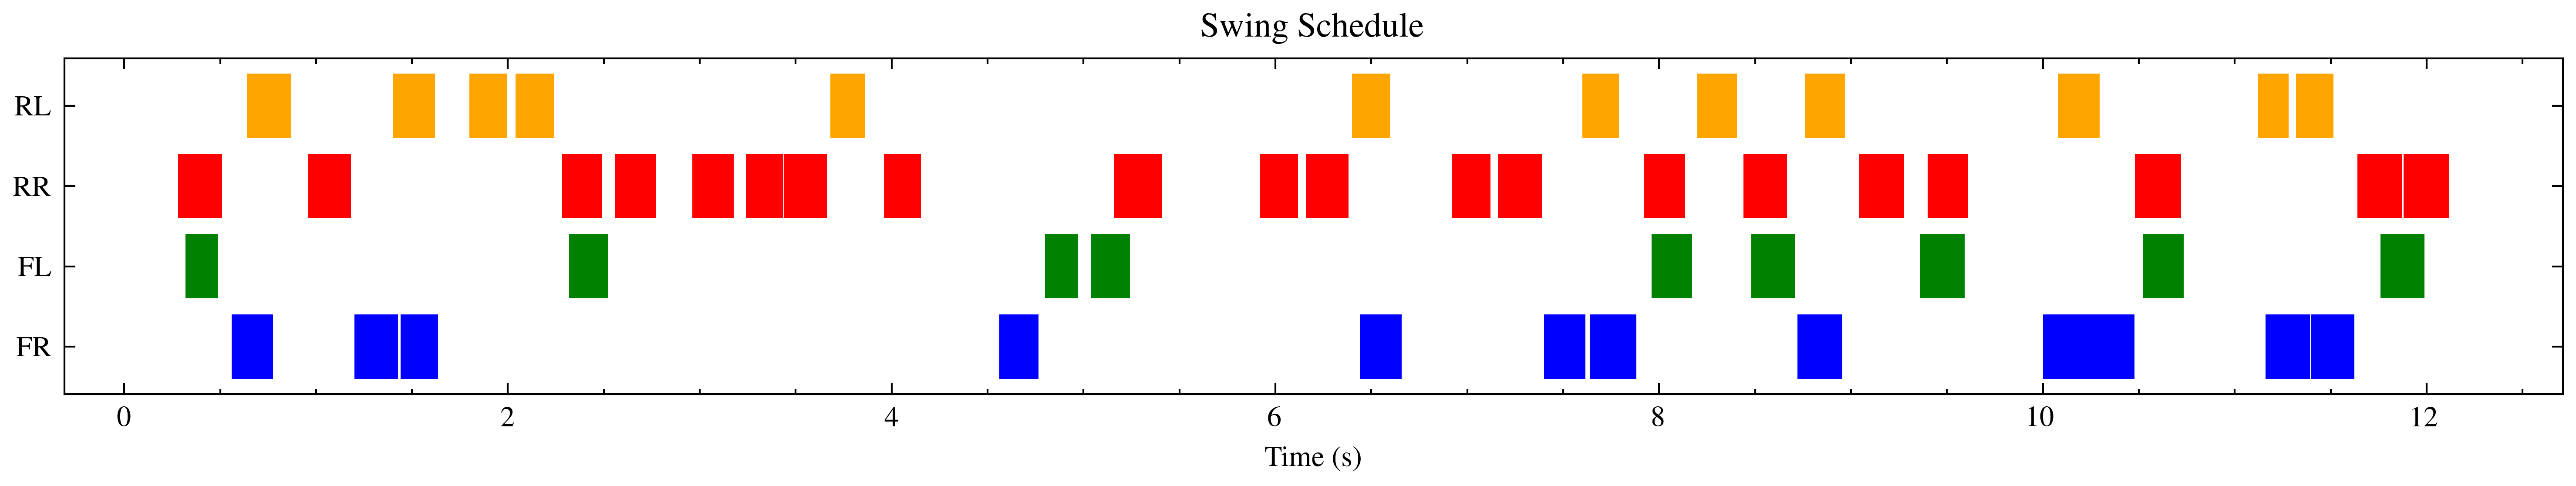

In [40]:
# plot actions on matplotlib event plot
# where each foot has it's own line
fig, ax = plt.subplots(figsize=(10, 2))
foot_lines = {0: [], 1: [], 2: [], 3: []}
foot_colors = {0: 'b', 1: 'g', 2: 'r', 3: 'orange'}
for action in actions:
    foot_lines[action.foot].append((action.start, action.duration))

for foot, lines in foot_lines.items():
    print(lines)
    if lines:
        ax.broken_barh(lines, (foot - 0.4, 0.8), facecolors=foot_colors[foot])
ax.set_yticks([0, 1, 2, 3])
# remove y minor ticks
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.set_yticklabels(['FR', 'FL', 'RR', 'RL'])
ax.set_xlabel('Time (s)')
ax.set_title('Swing Schedule')
plt.tight_layout()
plt.show()